Comparing algorithms for path from node 0 to node 7


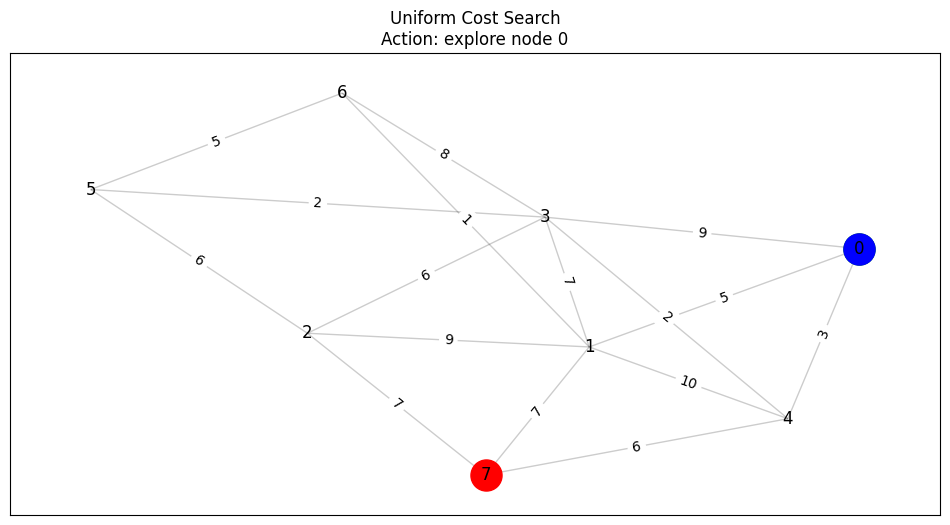

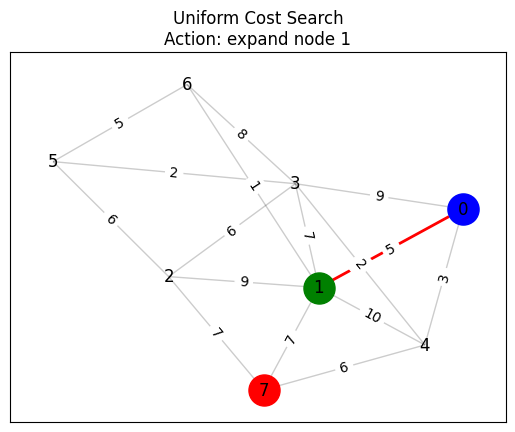

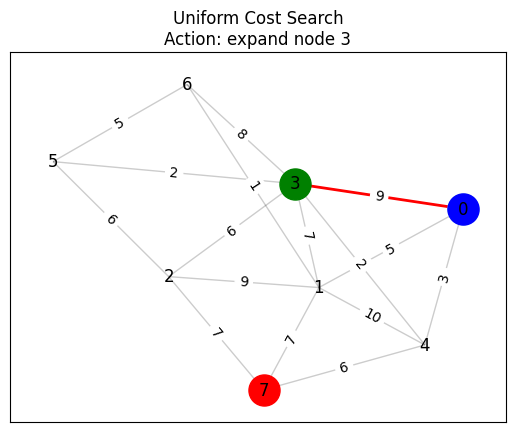

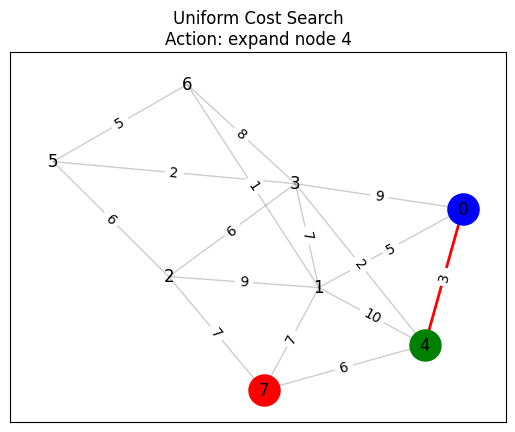

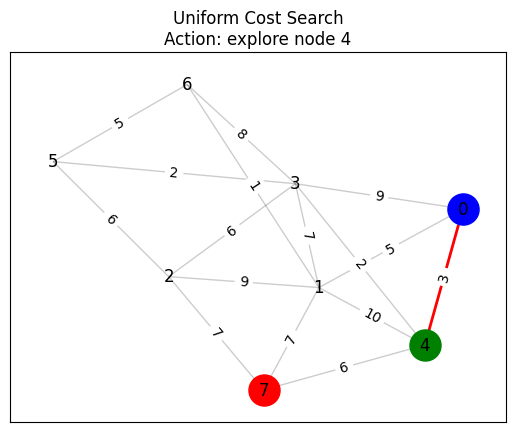

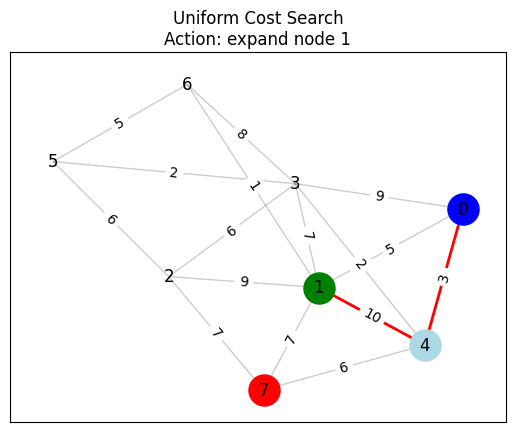

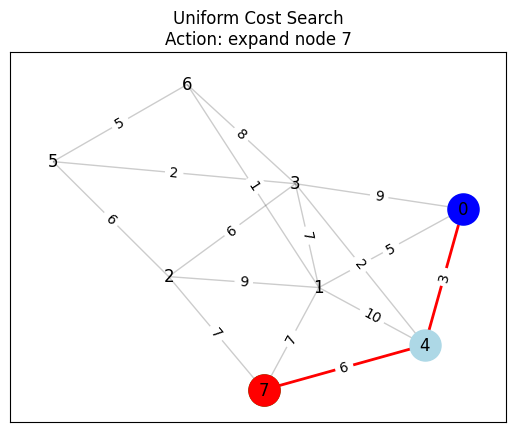

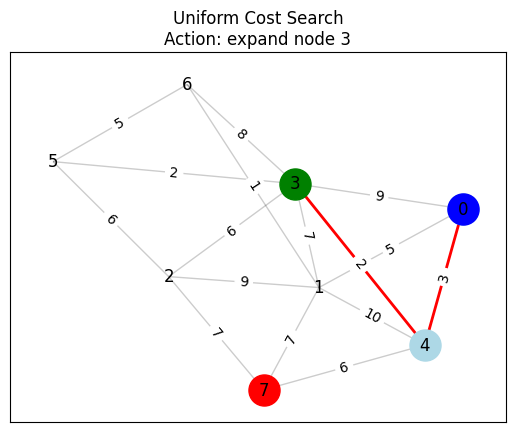

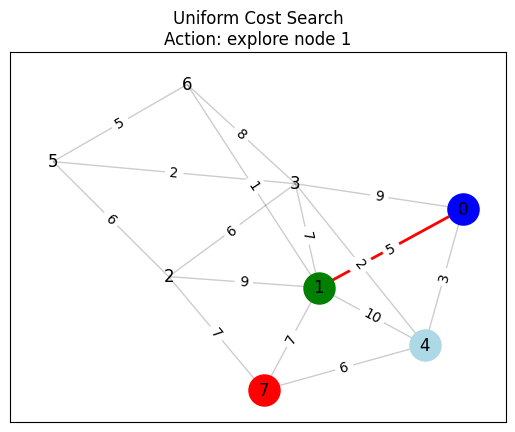

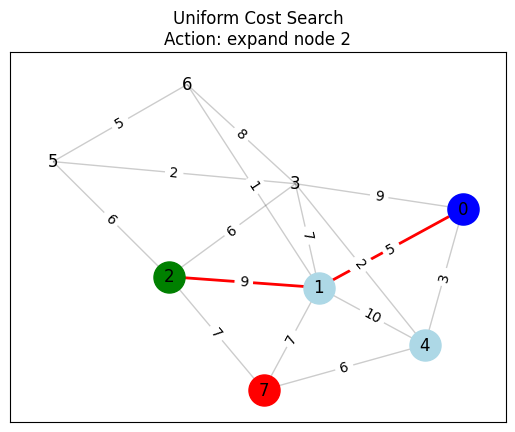

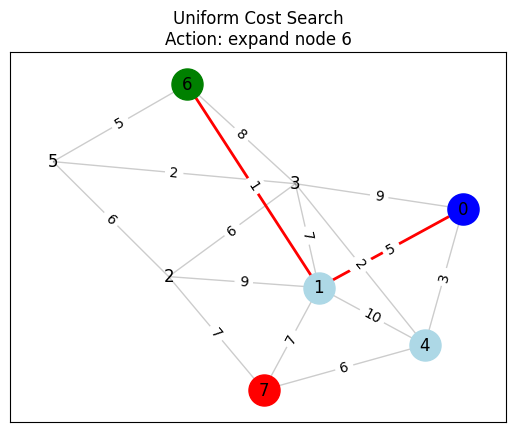

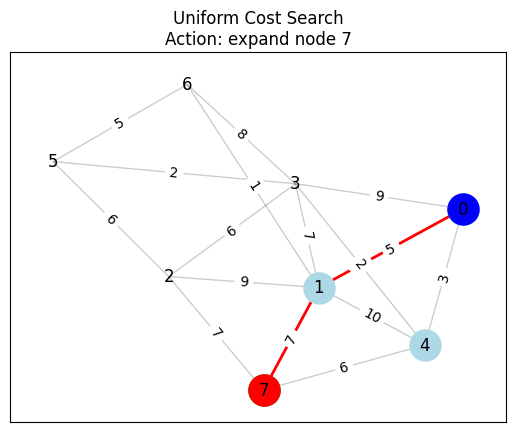

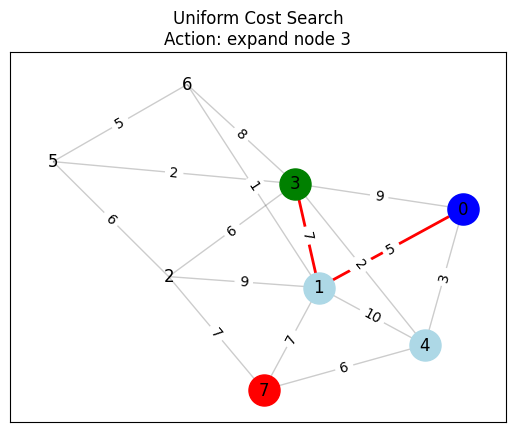

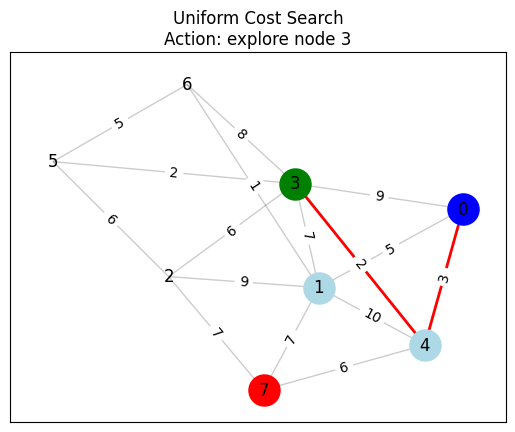

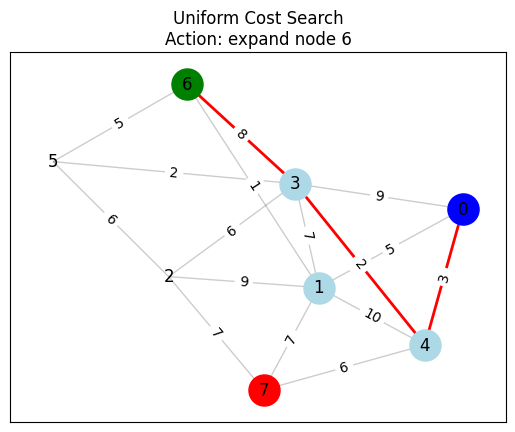

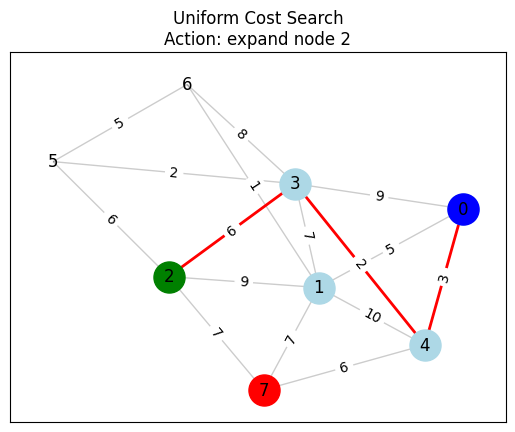

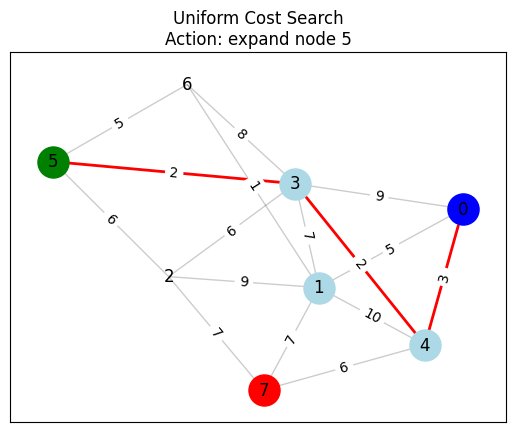

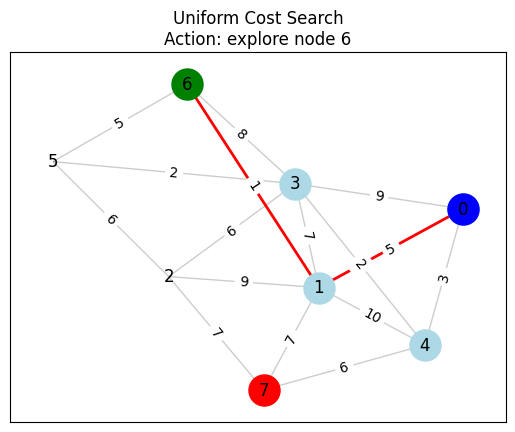

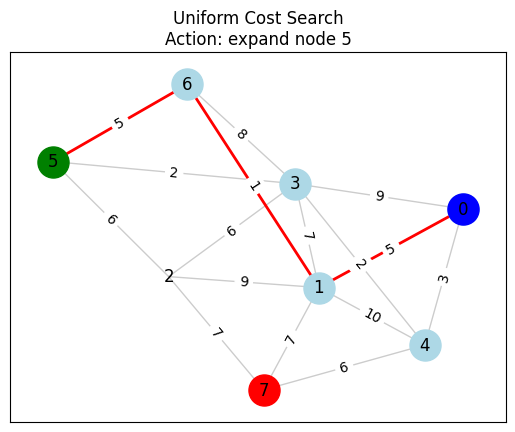

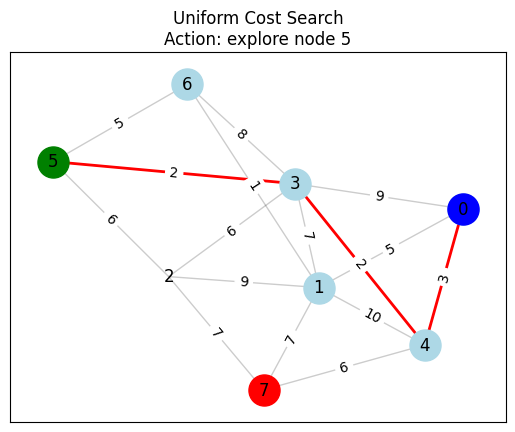

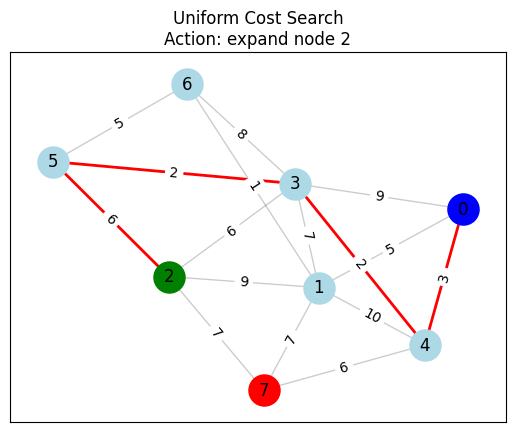

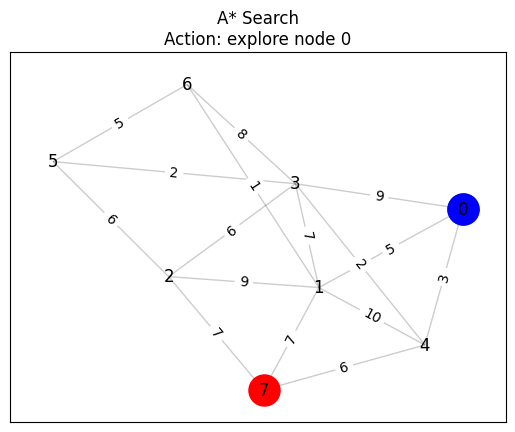

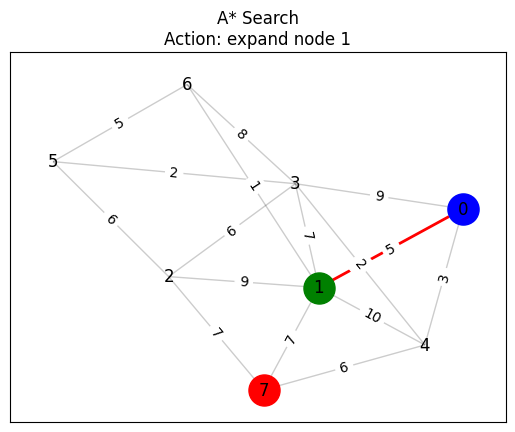

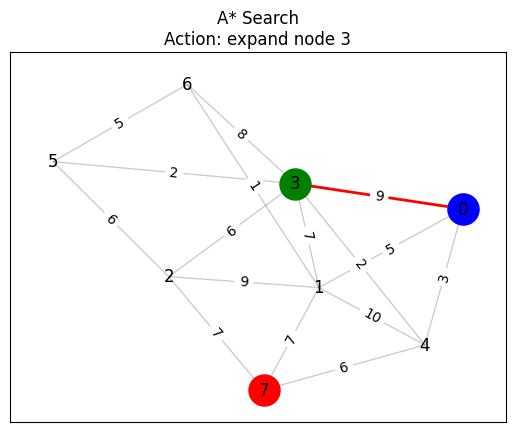

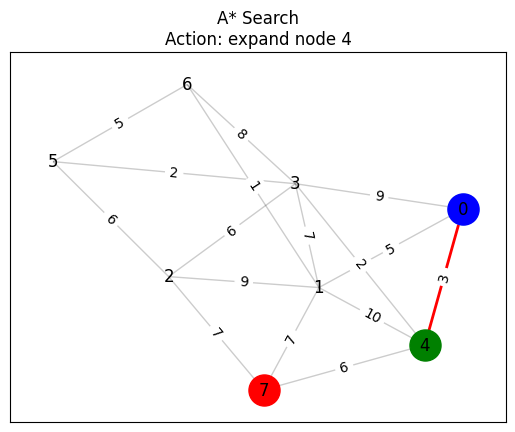

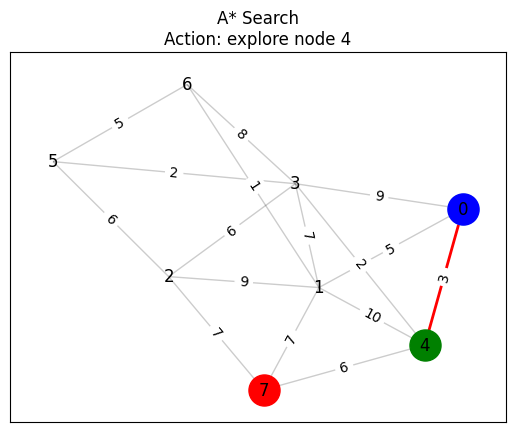

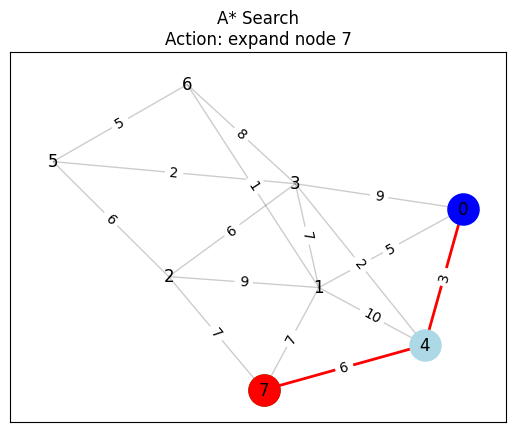

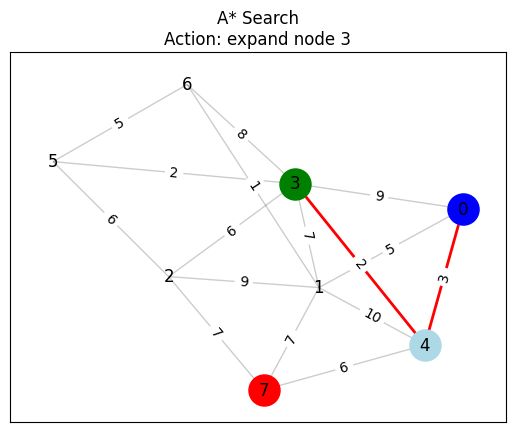

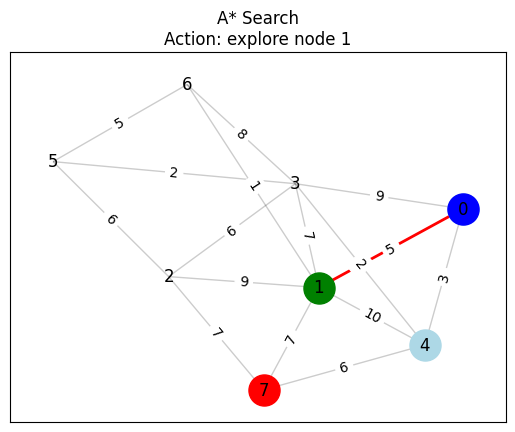

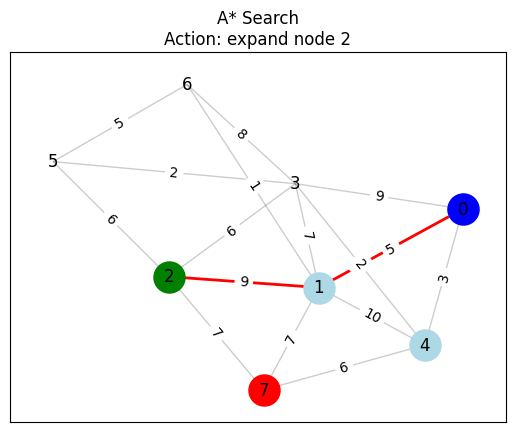

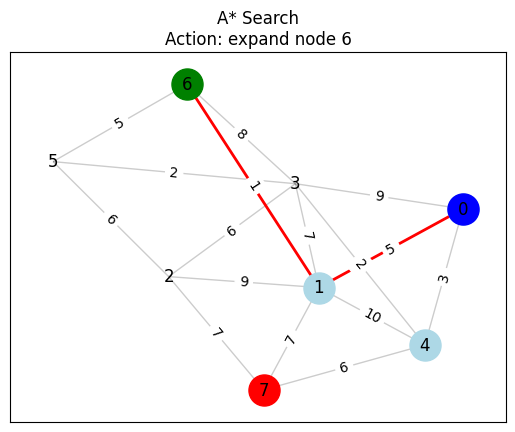

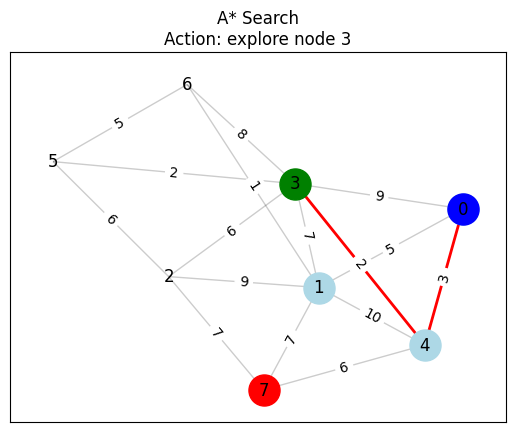

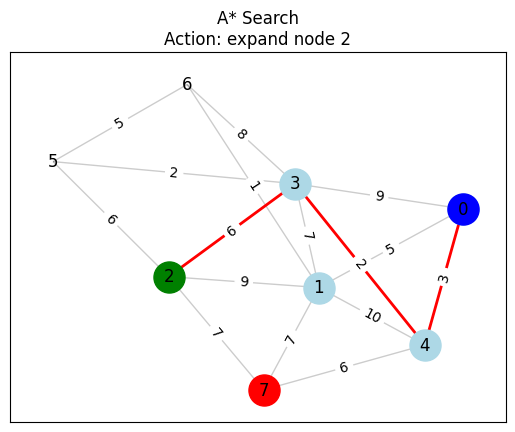

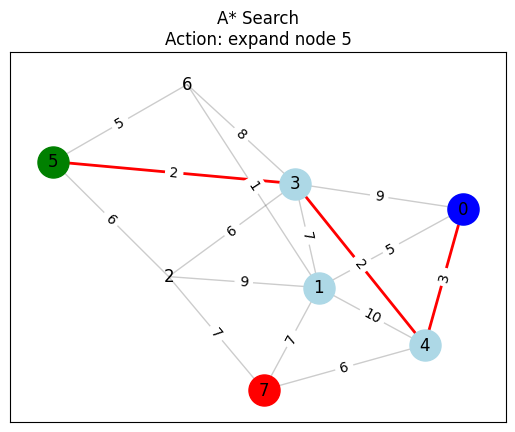

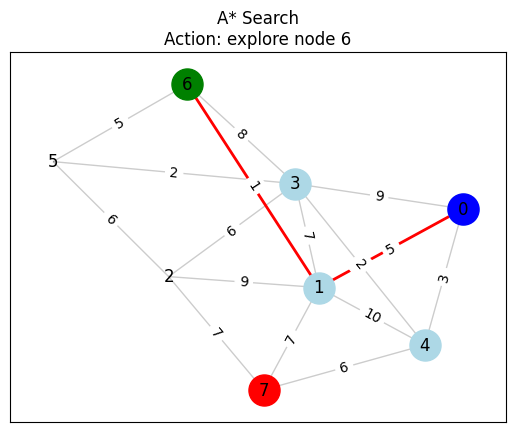

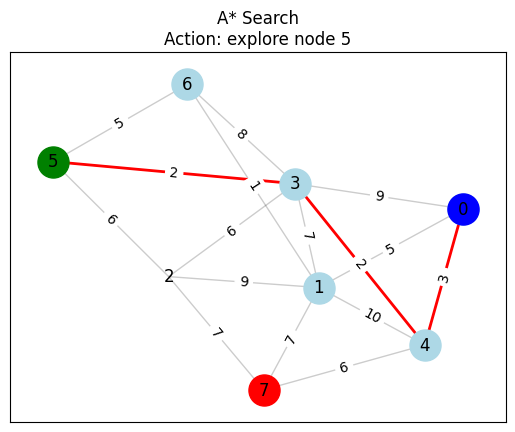


Results:
UCS Path: [0, 4, 7]
UCS Cost: 9
UCS Steps: 21
UCS Time: 0.0000 seconds

A* Path: [0, 4, 7]
A* Cost: 9
A* Steps: 15
A* Time: 0.0000 seconds


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import defaultdict
import time
import random

class PathFinder:
    def __init__(self):
        self.graph = None
        self.pos = None  # For consistent node positions in visualization
        
    def create_random_graph(self, n_nodes=10, n_edges=20, seed=42):
        """Create a random weighted graph"""
        random.seed(seed)
        
        # Create graph
        self.graph = nx.Graph()
        
        # Add nodes
        for i in range(n_nodes):
            self.graph.add_node(i)
        
        # Add random edges with weights
        while self.graph.number_of_edges() < n_edges:
            a = random.randint(0, n_nodes-1)
            b = random.randint(0, n_nodes-1)
            if a != b and not self.graph.has_edge(a, b):
                weight = random.randint(1, 10)
                self.graph.add_edge(a, b, weight=weight)
        
        # Generate positions for visualization
        self.pos = nx.spring_layout(self.graph, seed=seed)
        
        return self.graph
    
    def uniform_cost_search(self, start, goal):
        """Implement Uniform Cost Search"""
        frontier = [(0, start, [start])]  # (cost, node, path)
        explored = set()
        steps = []  # Track steps for visualization
        
        while frontier:
            cost, current, path = heapq.heappop(frontier)
            
            if current == goal:
                return path, cost, steps
            
            if current not in explored:
                explored.add(current)
                steps.append(('explore', current, path[:], explored.copy()))
                
                for neighbor in self.graph.neighbors(current):
                    if neighbor not in explored:
                        new_cost = cost + self.graph[current][neighbor]['weight']
                        new_path = path + [neighbor]
                        heapq.heappush(frontier, (new_cost, neighbor, new_path))
                        steps.append(('expand', neighbor, new_path[:], explored.copy()))
        
        return None, None, steps
    
    def heuristic(self, node, goal):
        """Calculate heuristic (Euclidean distance)"""
        return ((self.pos[node][0] - self.pos[goal][0])**2 + 
                (self.pos[node][1] - self.pos[goal][1])**2)**0.5
    
    def a_star_search(self, start, goal):
        """Implement A* Search"""
        frontier = [(0, start, [start])]  # (f_score, node, path)
        explored = set()
        g_score = defaultdict(lambda: float('inf'))
        g_score[start] = 0
        steps = []  # Track steps for visualization
        
        while frontier:
            f_score, current, path = heapq.heappop(frontier)
            
            if current == goal:
                return path, g_score[current], steps
            
            if current not in explored:
                explored.add(current)
                steps.append(('explore', current, path[:], explored.copy()))
                
                for neighbor in self.graph.neighbors(current):
                    if neighbor not in explored:
                        tentative_g = g_score[current] + self.graph[current][neighbor]['weight']
                        
                        if tentative_g < g_score[neighbor]:
                            g_score[neighbor] = tentative_g
                            f_score = tentative_g + self.heuristic(neighbor, goal)
                            new_path = path + [neighbor]
                            heapq.heappush(frontier, (f_score, neighbor, new_path))
                            steps.append(('expand', neighbor, new_path[:], explored.copy()))
        
        return None, None, steps
    
    def visualize_step(self, algorithm, step_info, start, goal):
        """Visualize a single step of the search process"""
        action, node, path, explored = step_info
        
        plt.clf()
        plt.title(f"{algorithm} Search\nAction: {action} node {node}")
        
        # Draw edges
        nx.draw_networkx_edges(self.graph, self.pos, alpha=0.2)
        
        # Draw explored nodes
        nx.draw_networkx_nodes(self.graph, self.pos, 
                             nodelist=list(explored - {node}),
                             node_color='lightblue',
                             node_size=500)
        
        # Draw current node
        nx.draw_networkx_nodes(self.graph, self.pos,
                             nodelist=[node],
                             node_color='green',
                             node_size=500)
        
        # Draw start and goal nodes
        nx.draw_networkx_nodes(self.graph, self.pos,
                             nodelist=[start],
                             node_color='blue',
                             node_size=500)
        nx.draw_networkx_nodes(self.graph, self.pos,
                             nodelist=[goal],
                             node_color='red',
                             node_size=500)
        
        # Draw current path
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(self.graph, self.pos,
                             edgelist=path_edges,
                             edge_color='r',
                             width=2)
        
        # Draw edge labels
        edge_labels = nx.get_edge_attributes(self.graph, 'weight')
        nx.draw_networkx_edge_labels(self.graph, self.pos, edge_labels=edge_labels)
        
        # Draw node labels
        nx.draw_networkx_labels(self.graph, self.pos)
        
        plt.pause(0.5)
    
    def compare_algorithms(self, start=0, goal=None):
        """Compare UCS and A* search"""
        if self.graph is None:
            self.create_random_graph()
        
        if goal is None:
            goal = self.graph.number_of_nodes() - 1
        
        print(f"Comparing algorithms for path from node {start} to node {goal}")
        
        # Run UCS
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        start_time = time.time()
        ucs_path, ucs_cost, ucs_steps = self.uniform_cost_search(start, goal)
        ucs_time = time.time() - start_time
        
        for step in ucs_steps:
            self.visualize_step("Uniform Cost", step, start, goal)
        
        # Run A*
        plt.subplot(122)
        start_time = time.time()
        astar_path, astar_cost, astar_steps = self.a_star_search(start, goal)
        astar_time = time.time() - start_time
        
        for step in astar_steps:
            self.visualize_step("A*", step, start, goal)
        
        # Print results
        print("\nResults:")
        print(f"UCS Path: {ucs_path}")
        print(f"UCS Cost: {ucs_cost}")
        print(f"UCS Steps: {len(ucs_steps)}")
        print(f"UCS Time: {ucs_time:.4f} seconds")
        print(f"\nA* Path: {astar_path}")
        print(f"A* Cost: {astar_cost}")
        print(f"A* Steps: {len(astar_steps)}")
        print(f"A* Time: {astar_time:.4f} seconds")
        
        plt.show()

def main():
    # Create PathFinder instance
    finder = PathFinder()
    
    # Create random graph
    finder.create_random_graph(n_nodes=8, n_edges=16)
    
    # Compare algorithms
    finder.compare_algorithms(start=0, goal=7)

if __name__ == "__main__":
    main()